In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
import shutil
from sklearn.utils import shuffle

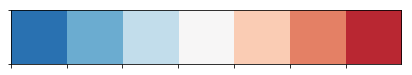

In [5]:
import seaborn as sns
sns.palplot(sns.color_palette("RdBu_r", 7))

sns.set_style("whitegrid")

In [6]:
sns.set()
flights_long = sns.load_dataset("flights")

In [12]:
flights_long.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [8]:
flights = flights_long.pivot("month", "year", "passengers")

In [11]:
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


# Importando base de dados

<p>Base com todos os dados do sudeste</p>

In [60]:
dfhr = pd.read_csv('../data/extreme_prcp_evolution.csv')
print len(dfhr)

31710


In [61]:
dfhr.head(5)

,id,wsid,pstr,pend,psum,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
0,1,178,2008-03-05 01:00:00,2008-03-06 00:00:00,62.4,6.4,14.0,0.0,17.2,15.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,178,2008-03-05 02:00:00,2008-03-06 01:00:00,56.0,14.0,0.0,17.2,15.4,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,178,2008-03-05 04:00:00,2008-03-06 03:00:00,55.2,17.2,15.4,1.4,3.4,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.2
3,4,178,2008-03-16 01:00:00,2008-03-17 00:00:00,60.8,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.2
4,5,178,2008-03-16 06:00:00,2008-03-17 05:00:00,78.0,5.0,3.2,1.4,0.8,17.0,...,0.0,0.0,0.0,12.0,0.2,0.0,0.2,0.0,12.4,4.8


# Pré-processamento

In [62]:
dfhr['pstr'] = pd.to_datetime(dfhr['pstr'])
dfhr['pend'] = pd.to_datetime(dfhr['pend'])

In [63]:
DEL = ['id','pstr','pend','psum','wsid']
for c in DEL:
    dfhr = dfhr.drop(c, axis = 1)

In [64]:
dfhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31710 entries, 0 to 31709
Data columns (total 24 columns):
1     31710 non-null float64
2     31710 non-null float64
3     31710 non-null float64
4     31710 non-null float64
5     31710 non-null float64
6     31710 non-null float64
7     31710 non-null float64
8     31710 non-null float64
9     31710 non-null float64
10    31710 non-null float64
11    31710 non-null float64
12    31710 non-null float64
13    31710 non-null float64
14    31710 non-null float64
15    31710 non-null float64
16    31710 non-null float64
17    31710 non-null float64
18    31710 non-null float64
19    31710 non-null float64
20    31710 non-null float64
21    31710 non-null float64
22    31710 non-null float64
23    31710 non-null float64
24    31710 non-null float64
dtypes: float64(24)
memory usage: 5.8 MB


# Evolução dos extemos de chuva

In [65]:
evolution = dfhr.mean()

In [85]:
pd.to_numeric(evolution, errors='coerce')

1     5.995396
2     5.609019
3     4.301255
4     3.766679
5     3.471075
6     3.196033
7     3.004049
8     2.804762
9     2.694254
10    2.591063
11    2.489845
12    2.475131
13    2.465090
14    2.488300
15    2.506957
16    2.501097
17    2.545178
18    2.566105
19    2.597748
20    2.601936
21    2.553718
22    2.509852
23    2.408931
24    2.106131
dtype: float64

In [90]:
x =  evolution.keys().astype(int)
print (x)
y = evolution.values

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')


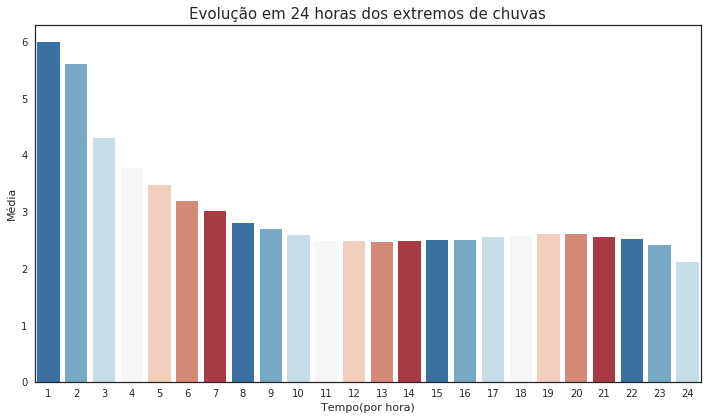

In [91]:
f,ax = plt.subplots(figsize=(10,6)) # set the plot size
ax.set_title(u'Evolução em 24 horas dos extremos de chuvas')
ax.title.set_fontsize(15) 

bar = sns.barplot(x, y, palette=sns.color_palette("RdBu_r", 7), ax=ax)

plt.xlabel(u'Tempo(por hora)')
plt.ylabel(u'Média')      

figure = bar.get_figure()
figure.tight_layout()
#figure.savefig('../graphs/ %month[k].lower(), dpi=200